<h1> Exploring Citi Bike / Dock Availability. </h1>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
# Plot preferences.
pl.rcParams.update({'font.size':22})

In [31]:
# Load Historical data.
df = pd.read_csv('../data/citibike/dock_historical/historical_data.csv', index_col=0)

/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
df.time = pd.to_datetime(df.time)

In [60]:
df.dock_id.unique()

array([  72,   79,   82,   83,  116,  119,  120,  127,  128,  137,  143,
        144,  146,  147,  150,  151,  152,  153,  157,  161,  164,  167,
        168,  173,  174,  195,  212,  216,  217,  223,  224,  225,  228,
        229,  232,  236,  237,  238,  239,  241,  242,  243,  244,  245,
        247,  248,  249,  251,  252,  253,  254,  257,  258,  259,  260,
        261,  262,  264,  265,  266,  267,  268,  270,  274,  275,  276,
        278,  279,  280,  281,  282,  284,  285,  289,  291,  293,  295,
        296,  297,  298,  301,  302,  303,  304,  305,  306,  307,  308,
        309,  310,  311,  312,  313,  315,  316,  317,  319,  320,  321,
        322,  323,  324,  325,  326,  327,  328,  330,  331,  332,  334,
        335,  336,  337,  339,  340,  341,  342,  343,  344,  345,  346,
        347,  348,  349,  350,  351,  352,  353,  354,  355,  356,  357,
        358,  359,  360,  361,  362,  363,  364,  365,  366,  367,  368,
        369,  372,  373,  376,  377,  379,  380,  3

/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


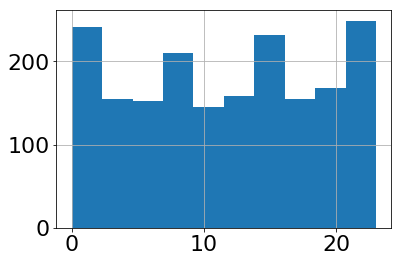

In [102]:
temp = df.query('dock_id == 314 and time.dt.weekday == 1')
temp['hour'] = temp.time.dt.hour
temp.hour.hist();

In [107]:
temp.query('hour == 12')['avail_bikes'].mean()

5.817073170731708

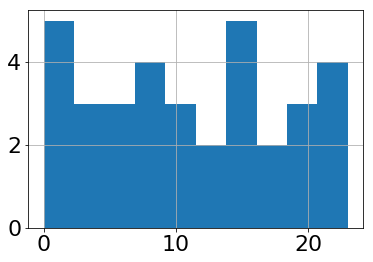

In [99]:
temp.hour.hist()

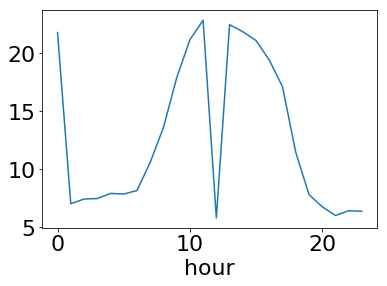

In [108]:
temp.groupby('hour')['avail_bikes'].mean().plot()

In [94]:
temp.hour.unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20,
       21, 23,  0,  7, 17,  3, 22])

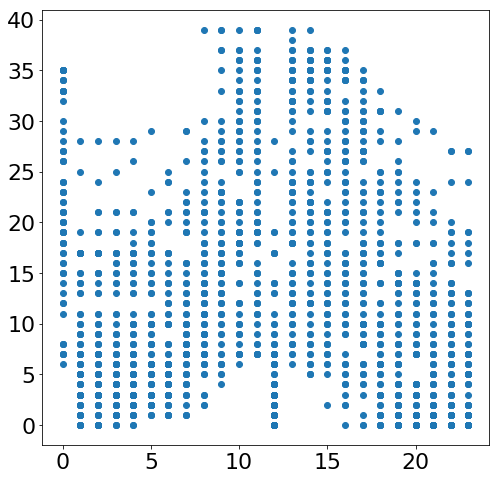

In [90]:
fig, ax = pl.subplots(figsize=(8,8))
ax.plot(temp.time.dt.hour, temp.avail_bikes, 'o')